# Student Name: Qadeer Hussain

# Student ID: C00270632

# Topic: Recurrent Neural Network (RNN) 

# Last Modified: 23/03/2025

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the data

Link to data: https://www.gutenberg.org/ebooks/1057

In [3]:
# Load the file
with open("EmilyDickinsonPoems.txt", "r", encoding="utf-8") as f:
    raw_data = f.readlines()

# Explore the dataset

In [4]:
# Print basic stats
print("Total Characters in Raw Text:", len(raw_data))
print("Sample of Raw Text:\n")
print(raw_data[:1000])

Total Characters in Raw Text: 10703
Sample of Raw Text:

['\ufeffThe Project Gutenberg eBook of Poems by Emily Dickinson, Three Series, Complete\n', '    \n', 'This ebook is for the use of anyone anywhere in the United States and\n', 'most other parts of the world at no cost and with almost no restrictions\n', 'whatsoever. You may copy it, give it away or re-use it under the terms\n', 'of the Project Gutenberg License included with this ebook or online\n', 'at www.gutenberg.org. If you are not located in the United States,\n', 'you will have to check the laws of the country where you are located\n', 'before using this eBook.\n', '\n', 'Title: Poems by Emily Dickinson, Three Series, Complete\n', '\n', 'Author: Emily Dickinson\n', '\n', 'Release date: May 1, 2004 [eBook #12242]\n', '                Most recently updated: December 14, 2020\n', '\n', 'Language: English\n', '\n', 'Credits: Produced by Jim Tinsley <jtinsley@pobox.com>\n', '\n', '\n', '*** START OF THE PROJECT GUTENBERG EBOOK

# Data Preprocssing

In [5]:
# Poems start from line 209
poem_lines = raw_data[209:]

In [6]:
# Clean up the text
poems = []
for line in poem_lines:
    stripped = line.strip()
    if stripped and not stripped.isupper() and not stripped.isdigit():
        poems.append(stripped)

In [7]:
# Join and lower case
text = " ".join(poems).lower()

In [8]:
# Print sample after cleaning
print("Sample text:\n", text[:1000])
print("\nTotal Characters in Corpus:", len(text))

Sample text:
 [published in "a masque of poets" at the request of "h.h.," the author's fellow-townswoman and friend.] success is counted sweetest by those who ne'er succeed. to comprehend a nectar requires sorest need. not one of all the purple host who took the flag to-day can tell the definition, so clear, of victory, as he, defeated, dying, on whose forbidden ear the distant strains of triumph break, agonized and clear! our share of night to bear, our share of morning, our blank in bliss to fill, our blank in scorning. here a star, and there a star, some lose their way. here a mist, and there a mist, afterwards -- day! soul, wilt thou toss again? by just such a hazard hundreds have lost, indeed, but tens have won an all. angels' breathless ballot lingers to record thee; imps in eager caucus raffle for my soul. 't is so much joy! 't is so much joy! if i should fail, what poverty! and yet, as poor as i have ventured all upon a throw; have gained! yes! hesitated so this side the victor

In [9]:
# Get unique characters in the dataset
chars = sorted(set(text)) 

# Creating mappings
char_to_index = {char: idx for idx, char in enumerate(chars)}
index_to_char = {idx: char for idx, char in enumerate(chars)}

In [10]:
print(f"Unique characters: {len(chars)}")
print(f"Sample character mappings: {list(char_to_index.items())[:100]}")

Unique characters: 64
Sample character mappings: [(' ', 0), ('!', 1), ('"', 2), ('$', 3), ('%', 4), ("'", 5), ('(', 6), (')', 7), ('*', 8), (',', 9), ('-', 10), ('.', 11), ('/', 12), ('0', 13), ('1', 14), ('2', 15), ('3', 16), ('4', 17), ('5', 18), ('6', 19), ('7', 20), ('8', 21), ('9', 22), (':', 23), (';', 24), ('?', 25), ('[', 26), (']', 27), ('_', 28), ('a', 29), ('b', 30), ('c', 31), ('d', 32), ('e', 33), ('f', 34), ('g', 35), ('h', 36), ('i', 37), ('j', 38), ('k', 39), ('l', 40), ('m', 41), ('n', 42), ('o', 43), ('p', 44), ('q', 45), ('r', 46), ('s', 47), ('t', 48), ('u', 49), ('v', 50), ('w', 51), ('x', 52), ('y', 53), ('z', 54), ('è', 55), ('ë', 56), ('—', 57), ('‘', 58), ('’', 59), ('“', 60), ('”', 61), ('•', 62), ('™', 63)]


# Create training sequences

In [11]:
SEQ_LENGTH = 100

In [12]:
inputs = []
outputs = []

for i in range(len(text) - SEQ_LENGTH):
    inputs.append(text[i : i + SEQ_LENGTH])
    outputs.append(text[i + SEQ_LENGTH])

print(f"Total sequences: {len(inputs)}")

Total sequences: 176243


In [13]:
# Convert text to numerical format
X = np.array([[char_to_index[char] for char in seq] for seq in inputs])
y = np.array([char_to_index[char] for char in outputs])

In [14]:
print(f"Using {len(X)} sequences for training")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Using 176243 sequences for training
X shape: (176243, 100), y shape: (176243,)


In [15]:
X = to_categorical(X, num_classes=len(chars))
y = to_categorical(y, num_classes=len(chars))

In [16]:
print(f"New x shape (one-hot encoded): {X.shape}")
print(f"New y shape (one-hot encoded): {y.shape}")

New x shape (one-hot encoded): (176243, 100, 64)
New y shape (one-hot encoded): (176243, 64)


# Build the model

In [22]:
# Define RNN LSTM model
model = Sequential([
    LSTM(256, input_shape=(SEQ_LENGTH, len(chars)), return_sequences=True),
    LSTM(256),
    Dense(len(chars), activation="softmax")
])

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 256)          328704    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
Total params: 870464 (3.32 MB)
Trainable params: 870464 (3.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the model

In [26]:
EPOCHS = 20
BATCH_SIZE = 256

In [27]:
history = model.fit(
    X, 
    y, 
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS
)

Epoch 1/20
689/689 [==============================] - 441s 639ms/step - loss: 2.4629 - accuracy: 0.2973
Epoch 2/20
689/689 [==============================] - 442s 641ms/step - loss: 2.0200 - accuracy: 0.4034
Epoch 3/20
689/689 [==============================] - 447s 649ms/step - loss: 1.8513 - accuracy: 0.4453
Epoch 4/20
689/689 [==============================] - 438s 635ms/step - loss: 1.7409 - accuracy: 0.4738
Epoch 5/20
689/689 [==============================] - 438s 635ms/step - loss: 1.6537 - accuracy: 0.4972
Epoch 6/20
689/689 [==============================] - 438s 635ms/step - loss: 1.5812 - accuracy: 0.5179
Epoch 7/20
689/689 [==============================] - 437s 635ms/step - loss: 1.5143 - accuracy: 0.5356
Epoch 8/20
689/689 [==============================] - 438s 635ms/step - loss: 1.4513 - accuracy: 0.5527
Epoch 9/20
689/689 [==============================] - 438s 635ms/step - loss: 1.3910 - accuracy: 0.5697
Epoch 10/20
689/689 [==============================] - 439s 637m

In [28]:
print("Final Training Accuracy:", history.history['accuracy'][-1])

Final Training Accuracy: 0.7600415349006653


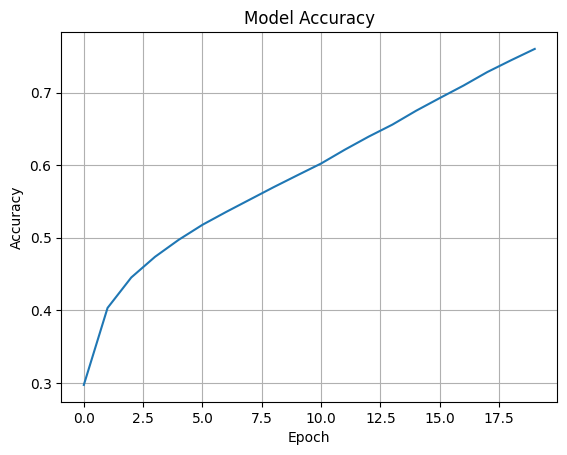

In [29]:
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

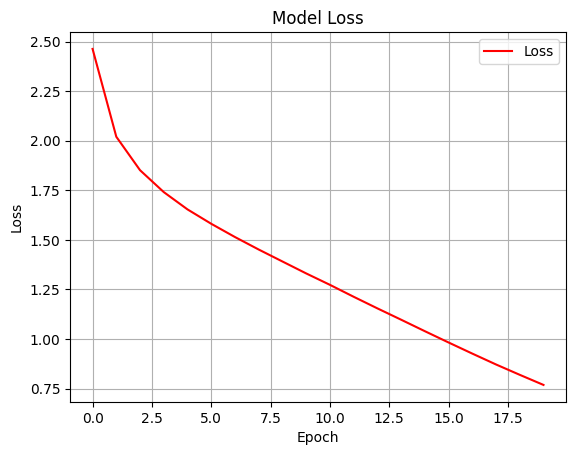

In [30]:
plt.plot(history.history['loss'], label='Loss', color='red')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Testing the model

In [31]:
def generate_text(model, start_string, num_generate=300, temperature=1.0):
    # Convert start string to indices
    input_indices = [char_to_index.get(char, 0) for char in start_string.lower()]

    # Pad or trim the input to match SEQ_LENGTH
    if len(input_indices) < SEQ_LENGTH:
        input_indices = [0] * (SEQ_LENGTH - len(input_indices)) + input_indices
    else:
        input_indices = input_indices[-SEQ_LENGTH:]

    # One-hot encode the input
    input_seq = tf.keras.utils.to_categorical(input_indices, num_classes=len(chars))
    input_seq = np.expand_dims(input_seq, 0)

    generated_text = start_string

    for i in range(num_generate):
        predictions = model.predict(input_seq, verbose=0)[0]
        predictions = predictions / temperature

        predictions = predictions / np.sum(predictions)
        predicted_id = np.random.choice(len(chars), p=predictions)
        predicted_char = index_to_char[predicted_id]

        generated_text += predicted_char

        # Update input sequence
        input_indices = input_indices[1:] + [predicted_id]
        input_seq = tf.keras.utils.to_categorical(input_indices, num_classes=len(chars))
        input_seq = np.expand_dims(input_seq, 0)

    return generated_text

In [41]:
seed_text = "Because I could not stop for Death"
for temp in [0.3, 0.5, 0.7, 1.0]:
    print(f"\n--- Temperature: {temp} ---")
    generated = generate_text(model, start_string=seed_text, num_generate=300, temperature=temp)
    print(generated)


--- Temperature: 0.3 ---
Because I could not stop for Death, in bliss i knew! it will not be out it worlows, alf its down. i stand have siteless of the fow company. we knows to keep; then abody cares! i should have the exchust were too punctuit, since that thisming cruttic take, and comes at the time, the sun were come! i, but the peem is dun meet i've stop

--- Temperature: 0.5 ---
Because I could not stop for Death's agarring it, but peorlisience a many, -- and the upen which, bectood in mechlor of his brain, i sep your broke away to look enough in butterfloes.. if you are goe. literaily save, since i hought: how many till yesterday, but one, and mides a hummer was that lay! 't was it a mounderish, -- the rai

--- Temperature: 0.7 ---
Because I could not stop for Death, he could not hair. a dimine, aliope's certainly will were the eaves; no one 't is and i, then con't be each the jesumaim firm her grash with the bells at thick, he grapposed in being's bearing; fruall is the village 

# Saving the model

In [42]:
model.save("poetry_generator_model.h5")

C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("emily_dickinson_rnn_model.h5")